In [1]:
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from azure.storage.blob import BlobServiceClient

In [10]:
from src.paychex_ml.utils import load_credentials
from src.paychex_ml.ts_diagnosis import stationarity_test
from src.paychex_ml.ts_diagnosis import autocorrelation_test
from src.paychex_ml.ts_diagnosis import get_trend

In [3]:
credentials = load_credentials("blob_storage",
                               file="C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/credentials.yml")

In [4]:
# Start client
container_name = "clean-data"
blob_service_client = BlobServiceClient.from_connection_string(credentials['conn_string'])
container_client = blob_service_client.get_container_client(container_name)

In [5]:
# Download file
file = 'paychex_revenue.parquet'
stream_downloader = container_client.download_blob(file)
stream = BytesIO()
stream_downloader.readinto(stream)

34156

In [6]:
df = pd.read_parquet(stream, engine='pyarrow')
df['Calendar Date'] = pd.PeriodIndex(df['Calendar Date'], freq='M')
df = df.set_index('Calendar Date')
df_month = pd.concat([df[df['Scenario']=='Actual'],
                      df[(df['Scenario']=='Forecast')&(df['Version']=='8+4')&(df.index<'2022-04')]
                      ])
#df_month = df_month.select_dtypes(include=np.number)

In [7]:
df_month

,Scenario,Version,Fiscal Period,11 Payroll Blended Products,12 W2 Revenue,13 Delivery Revenue,14 ASO Allocation,15 Other Processing Revenue,16 SurePayroll,17 Total International,20 Total 401k,31 HR Solutions (excl PEO),32 ASO Revenue - Oasis,40 Total Online Services,50 Other Managment Solutions,60 Total PEO,70 Total Insurance Services,80 Interest on Funds Held for Clients
Calendar Date,,,,,,,,,,,,,,,,,,
2014-06,Actual,Final Revised,FY1501,99633512.0,7031234.09,7393351.97,7255027.55,4765775.19,3246967.02,808003.64,14883414.0,21143605.0,0.00,8581821.0,6350954.0,12948698.0,10084069.0,3308153.0
2014-07,Actual,Final Revised,FY1502,121619696.0,7325377.82,13513741.18,9070820.80,6502729.54,3362473.02,855305.18,15071771.0,25838048.0,0.00,9700908.0,7011081.0,14670280.0,10353254.0,3466374.0
2014-08,Actual,Final Revised,FY1503,99472483.0,7443620.46,7286966.62,7489159.50,4215268.17,3286111.93,801651.38,14783933.0,21762760.0,0.00,8726405.0,6765242.0,14606683.0,10968738.0,3434418.0
2014-09,Actual,Final Revised,FY1504,94198230.0,7414842.11,7081861.96,7011292.24,4726806.24,3345328.53,834334.16,17075301.0,20288451.0,0.00,8945846.0,6369484.0,14456324.0,11250149.0,3419918.0
2014-10,Actual,Final Revised,FY1505,124353873.0,7818212.35,13741077.44,9372927.59,6514037.07,3402641.78,869205.85,18252956.0,26755143.0,0.00,10156903.0,7345929.0,14544807.0,11859545.0,3472038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11,Forecast,8+4,FY2206,117503730.0,155279.24,7617424.02,18200667.03,9402313.19,8070593.59,4468419.01,25836223.0,51630144.0,235392.82,16702061.0,20816112.0,68898426.0,15564350.0,4723736.0
2021-12,Forecast,8+4,FY2207,127800869.0,192584.15,8212787.33,19189993.34,15988997.51,13553160.66,5355183.42,26002181.0,54473328.0,305725.47,16913014.0,25894456.0,76848324.0,17464651.0,4927517.0
2022-01,Forecast,8+4,FY2208,103869768.0,81544421.44,22435519.84,17242037.23,20866313.40,7943756.66,5022326.69,25826261.0,49289702.0,246550.95,17506095.0,23202372.0,96241778.0,15110214.0,4865483.0


# Stationary Test & ACR

11 Payroll Blended Products
-----------------------------------------------------------
12 W2 Revenue


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
13 Delivery Revenue
-----------------------------------------------------------
14 ASO Allocation


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
15 Other Processing Revenue
-----------------------------------------------------------
16 SurePayroll


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
17 Total International
-----------------------------------------------------------
20 Total 401k


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
31 HR Solutions (excl PEO)
-----------------------------------------------------------
32 ASO Revenue - Oasis


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
40 Total Online Services
-----------------------------------------------------------
50 Other Managment Solutions


C:\Users\bruno.gonzalez\DataspellProjects\Paychex_revenue_forecast\src\paychex_ml\ts_diagnosis.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 6), constrained_layout=True)
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change 

-----------------------------------------------------------
60 Total PEO
-----------------------------------------------------------
70 Total Insurance Services


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
80 Interest on Funds Held for Clients
-----------------------------------------------------------


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


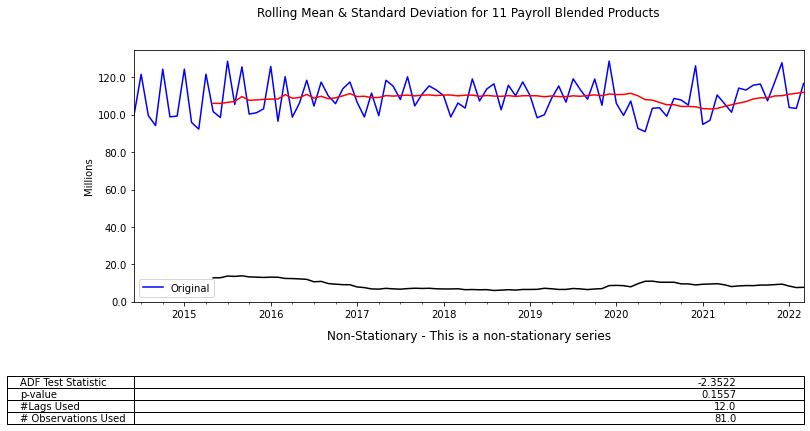

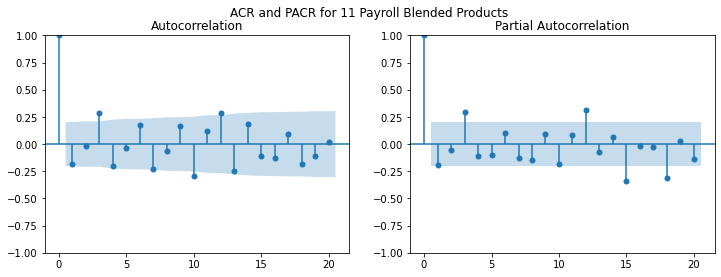

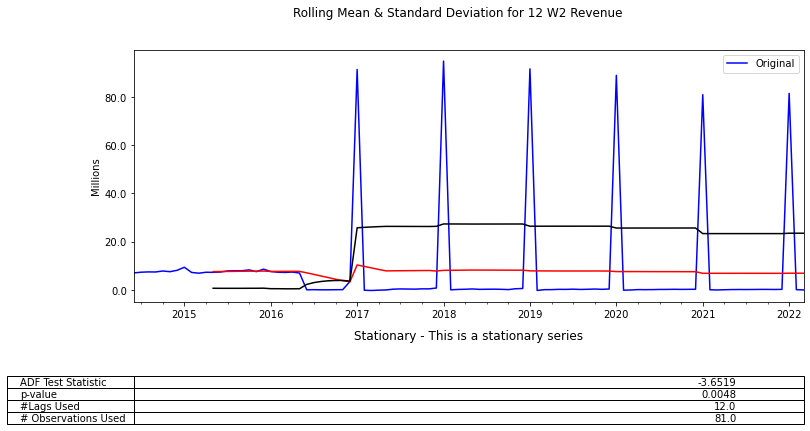

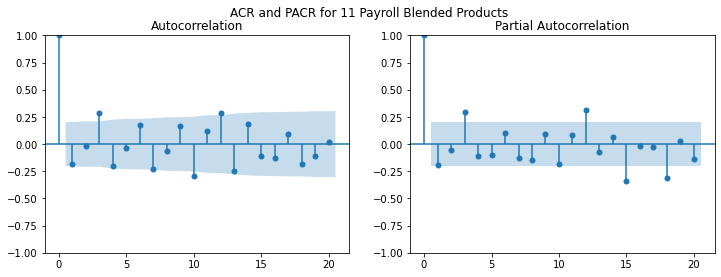

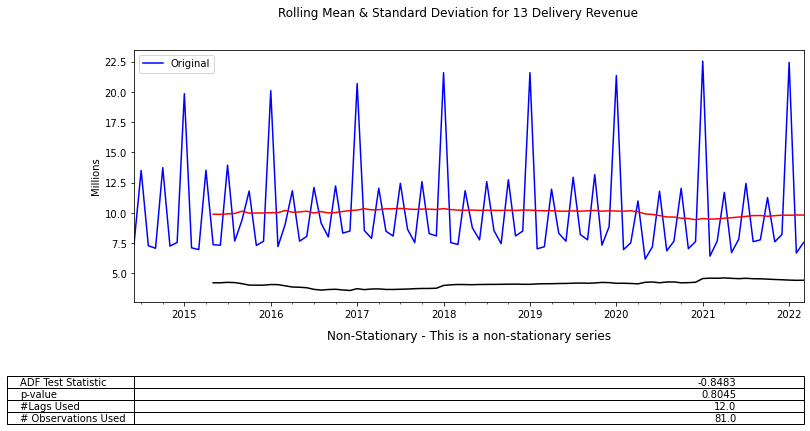

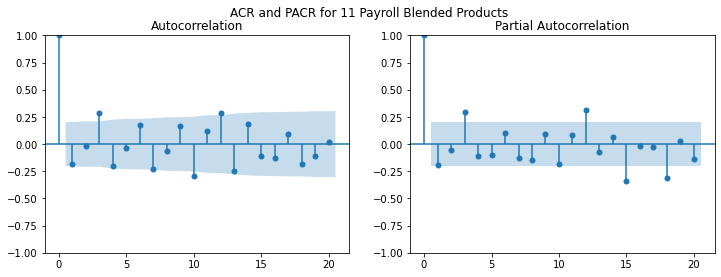

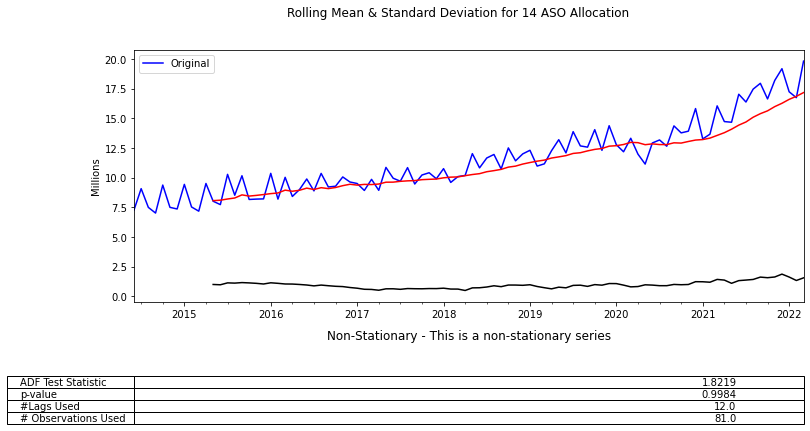

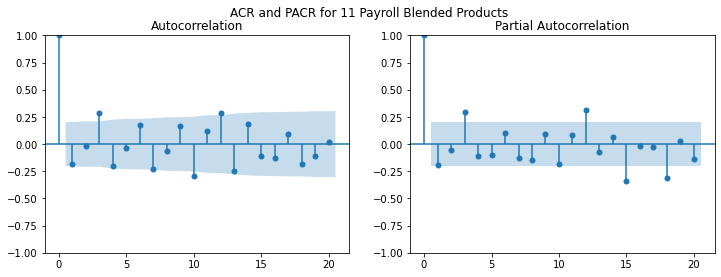

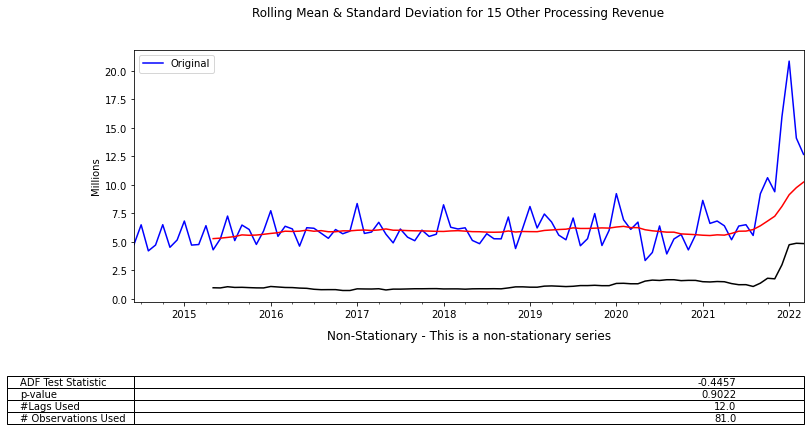

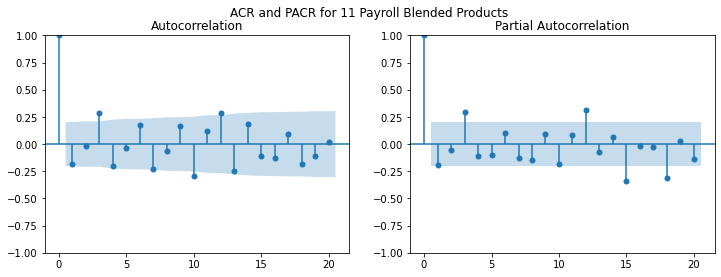

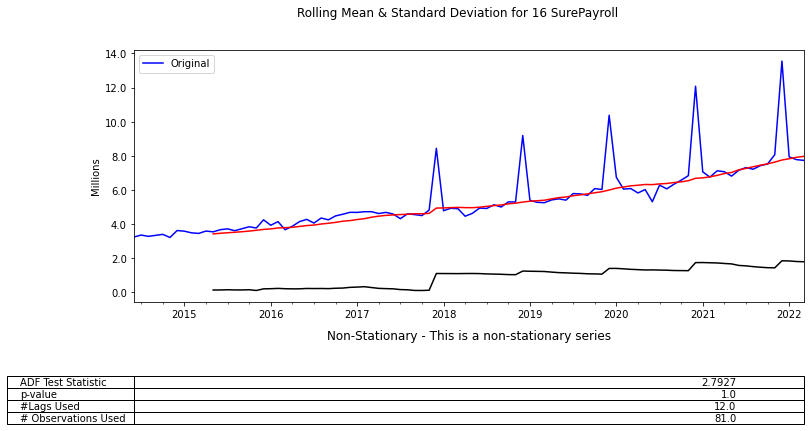

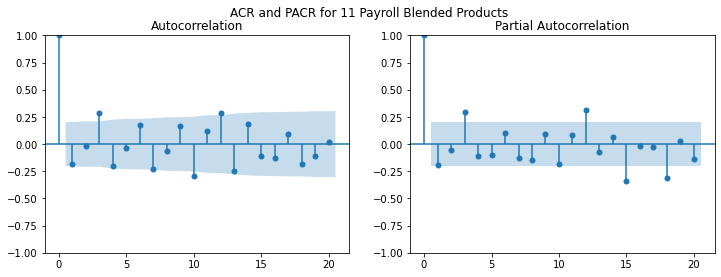

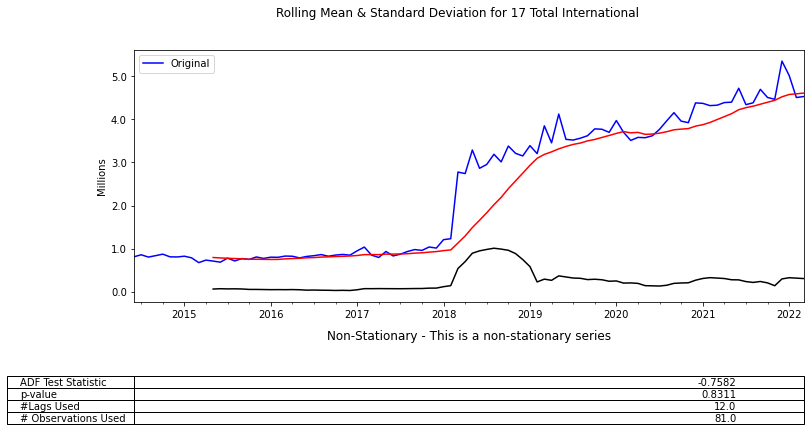

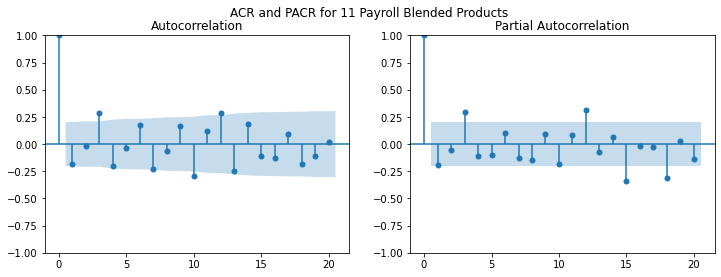

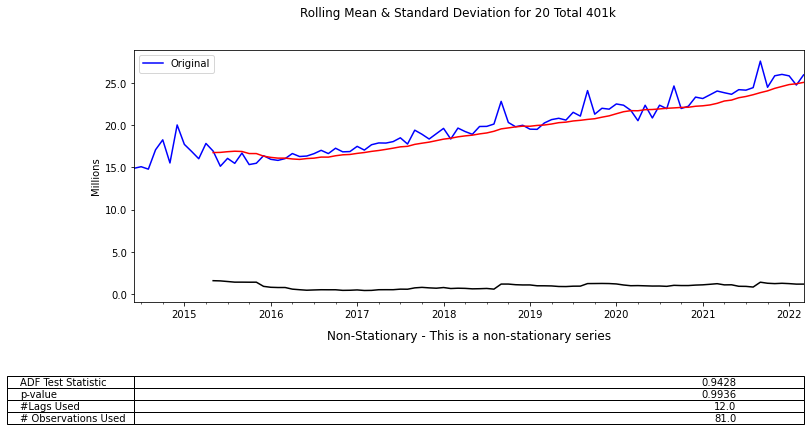

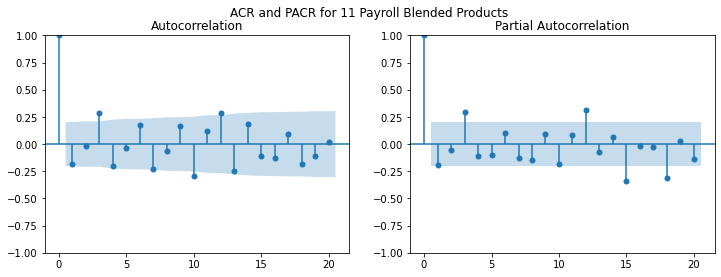

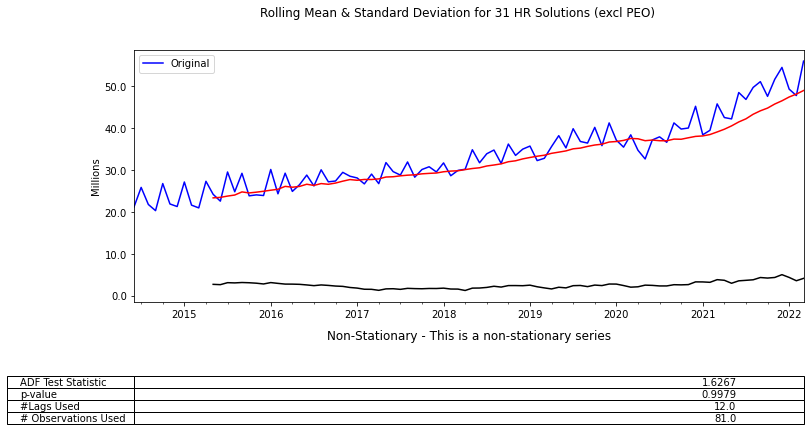

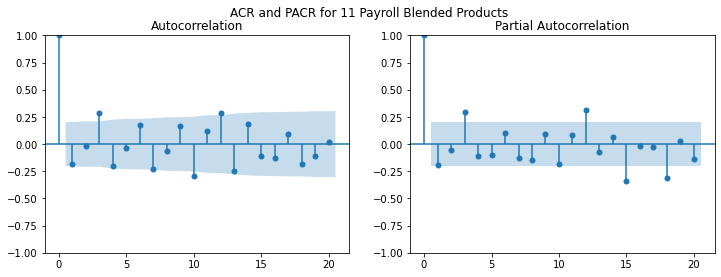

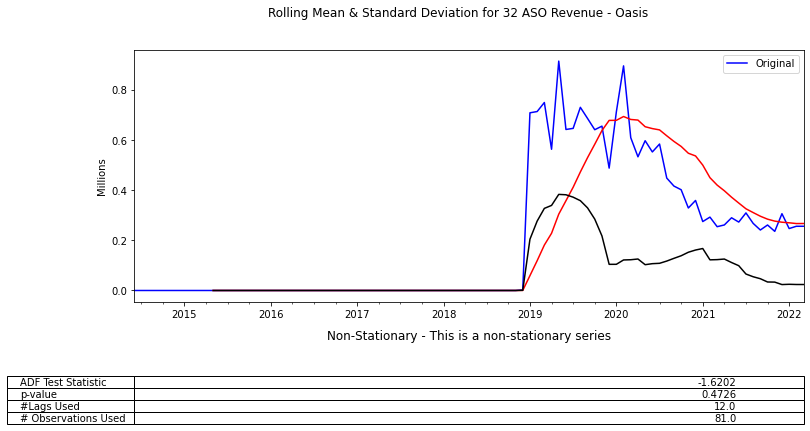

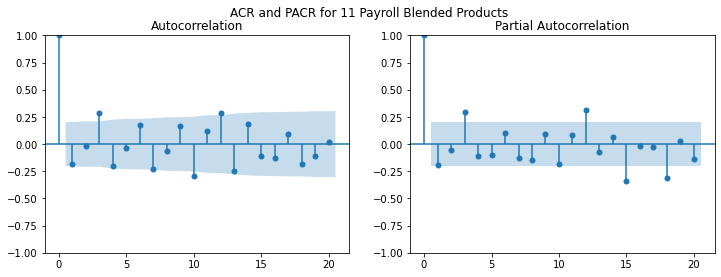

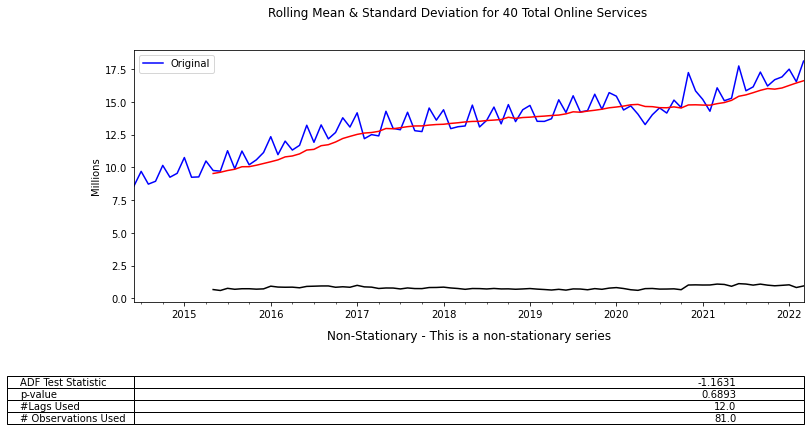

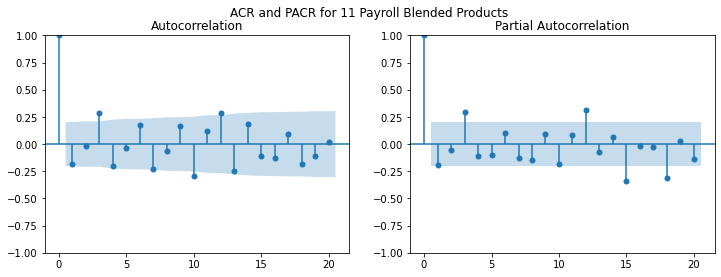

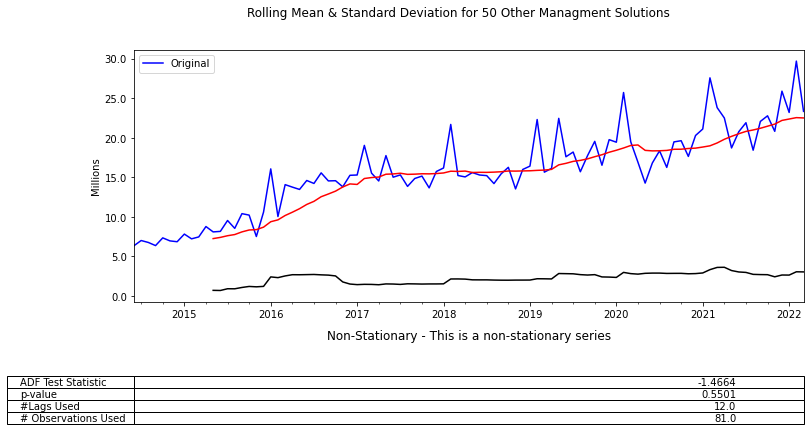

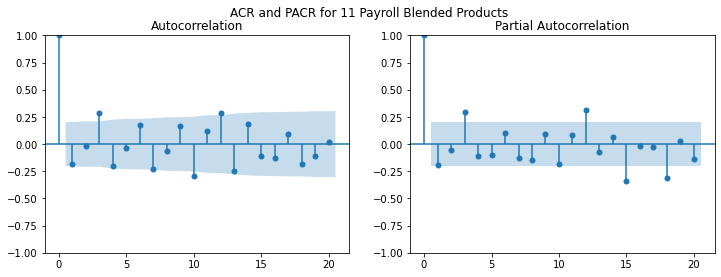

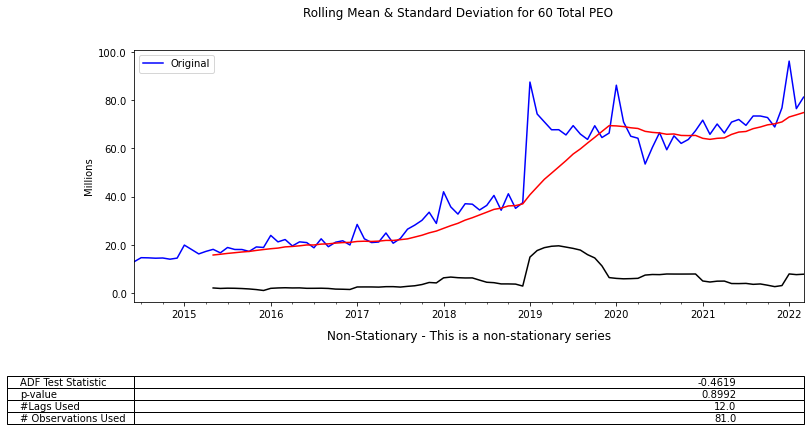

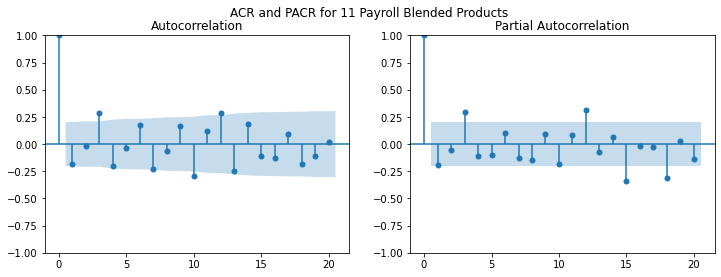

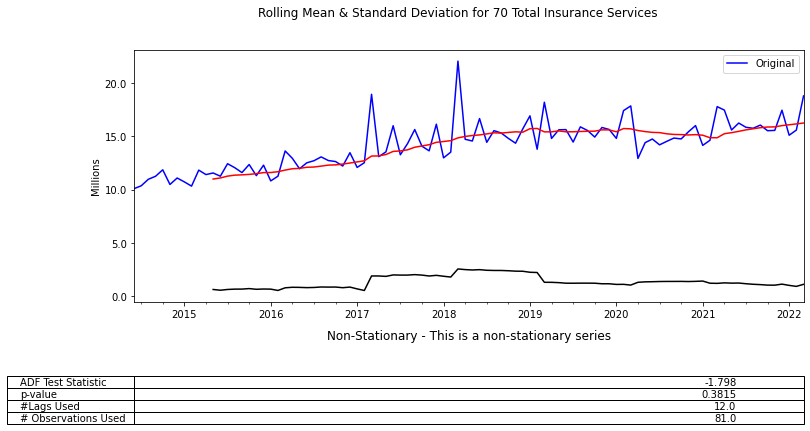

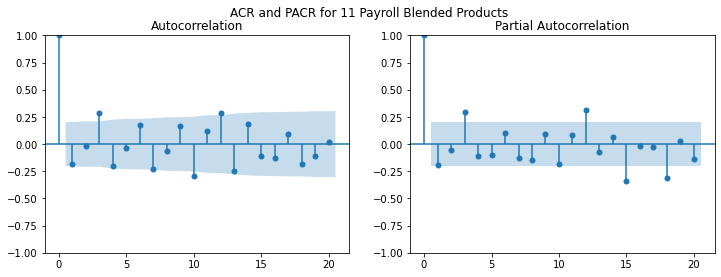

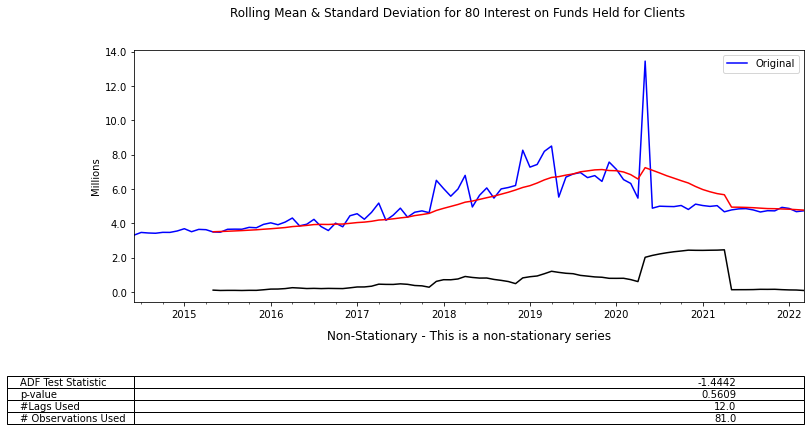

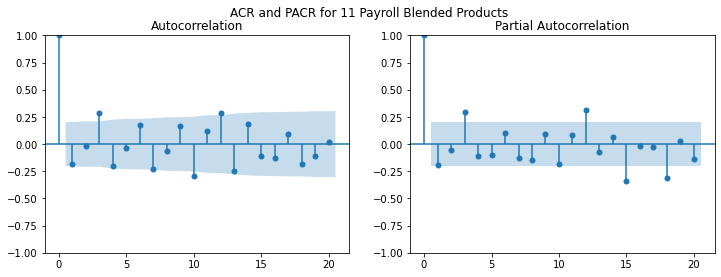

In [8]:
for c in df_month.select_dtypes(include=np.number).columns:
    print (c)
    fig = stationarity_test(df_month[c], maxlag=12, autolag=None)
    fig = autocorrelation_test(df_month['11 Payroll Blended Products'])
    print("-----------------------------------------------------------")

## Remove trend with linear regression

In [11]:
ts = df_month['14 ASO Allocation']

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


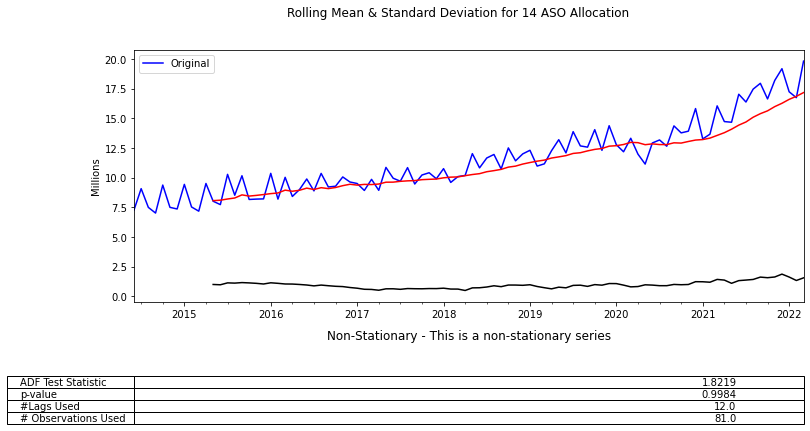

In [19]:
fig = stationarity_test(ts, maxlag=12, autolag=None)

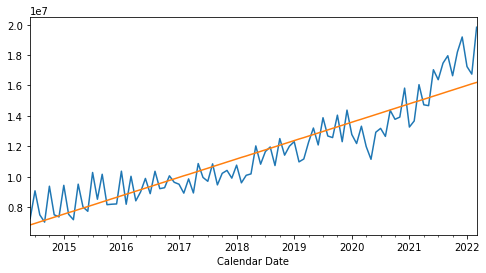

In [20]:
trend_14 = get_trend(ts)

In [21]:
ts_notrend = ts-trend_14

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


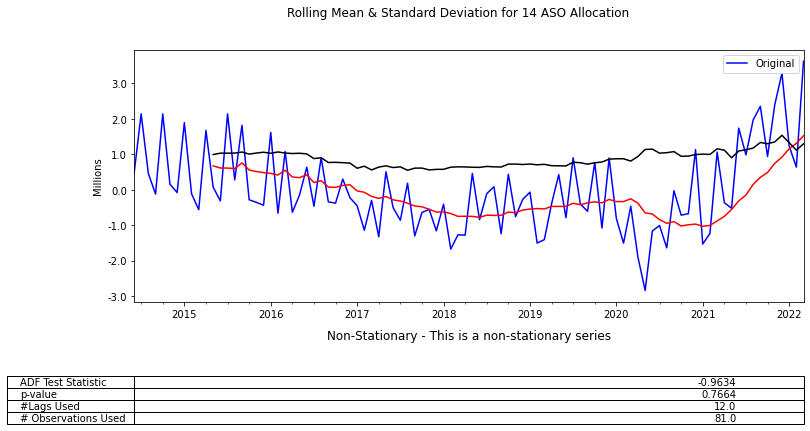

In [22]:
fig = stationarity_test(ts_notrend, maxlag=12, autolag=None)